# Unsupervised clustering for identifying spatial inhomogeneity on local electronic structures
Hideaki Iwasawa, Tetsuro Ueno, Takahiko Masui, Setsuko Tajima

Correspondence should be addressed to H.I. (iwasawa.hideaki@qst.go.jp)

# Part 4: Principal component analysis

- Module Setting


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time

- Load iEDCs or iADCs, if you prepared in "Part 1" in advance
- Select and run only one of two (target map will be updated by the last run)

In [2]:
%store -r xw
%store -r yw
%store -r xn
%store -r yn
%store -r pn
%store -r xpos
%store -r ypos

In [3]:
%store -r iEDCs
%store -r eng
targetMap = iEDCs
slice_axis = eng
slice_dir = 'iEDC'
xaxislabel = 'Binding energy (eV)'
sn = np.shape(eng)[0]

In [90]:
%store -r iADCs
%store -r ang
targetMap = iADCs
slice_axis = ang
slice_dir = 'iADC'
xaxislabel = 'Detector angle (deg)'
sn = np.shape(ang)[0]

## (4-i) Principal component analysis (PCA)

- Preset number of principal components (n<sub>PC</sub>)

In [4]:
n_comp = 8

- Main body

In [5]:
t1 = time.time() 

pca = PCA(n_components=n_comp)
H = pca.fit_transform(targetMap.T)
components = pca.components_.T

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

Elapsed Time:  0.016923189163208008


## (4-ii) Contribution Ratio & Cumulative Contribution Ratio (CR & CCR)

- Main Body & Plotting

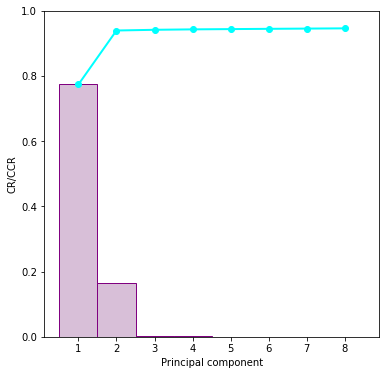

Elapsed Time:  0.10571742057800293


In [6]:
t1 = time.time()

cr = pca.explained_variance_ratio_
xcr = np.linspace(1, n_comp, n_comp)
ccr = np.cumsum(cr)
xccr = xcr

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, xlabel='Principal component', ylabel='CR/CCR')
ax.bar(xcr, cr, align='center', width=1, color = 'thistle', edgecolor='purple')
ax.plot(xccr, ccr, marker="o",linewidth=2, color = 'aqua')
ax.set_ylim(0, 1)
plt.show()

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

## (4-iii) Dimensional Reduction

- Plotting

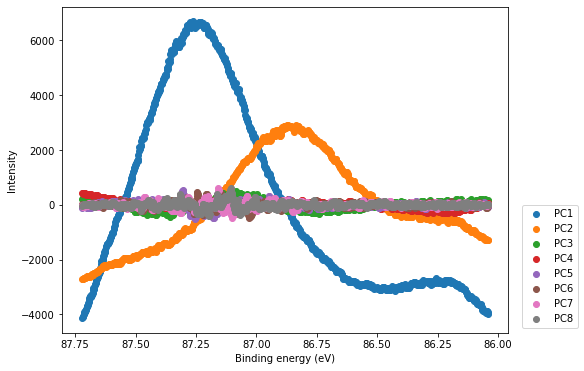

Elapsed Time:  0.2135014533996582


In [7]:
t1 = time.time()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, xlabel=xaxislabel, ylabel='Intensity')
for i in range(n_comp):
    curwv = H[:, i]
    curwv[0] = np.nan; curwv[sn-1] = np.nan
    ax.scatter(slice_axis, curwv, marker='o', label="PC"+str(i+1))
ax.legend(bbox_to_anchor=(1.02, 0.0), loc='lower left')
ax.invert_xaxis()
plt.show()

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

## (4-iv) Score Plot

- Preset target two principal components (0 ~ n<sub>PC</sub> - 1)

In [8]:
tarPC1 = 0
tarPC2 = 1

- Plotting

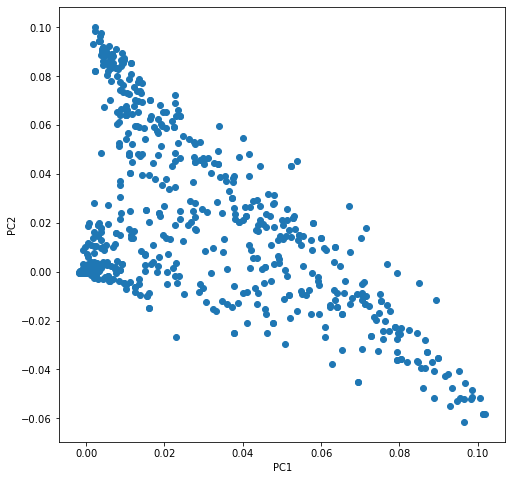

Elapsed Time:  0.10671520233154297


In [9]:
t1 = time.time()

compwv1 = components[:, tarPC1]
compwv2 = components[:, tarPC2]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, xlabel='PC'+str(tarPC1+1), ylabel='PC'+str(tarPC2+1))
ax.scatter(compwv1, compwv2)
plt.show()

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

## (4-iv) Spatial distribution of principal components

- Plotting

In [10]:
# Define number of row and columns for display
n_col = 5 # Set to adjust your screen
n_row = math.ceil(n_comp/n_col)

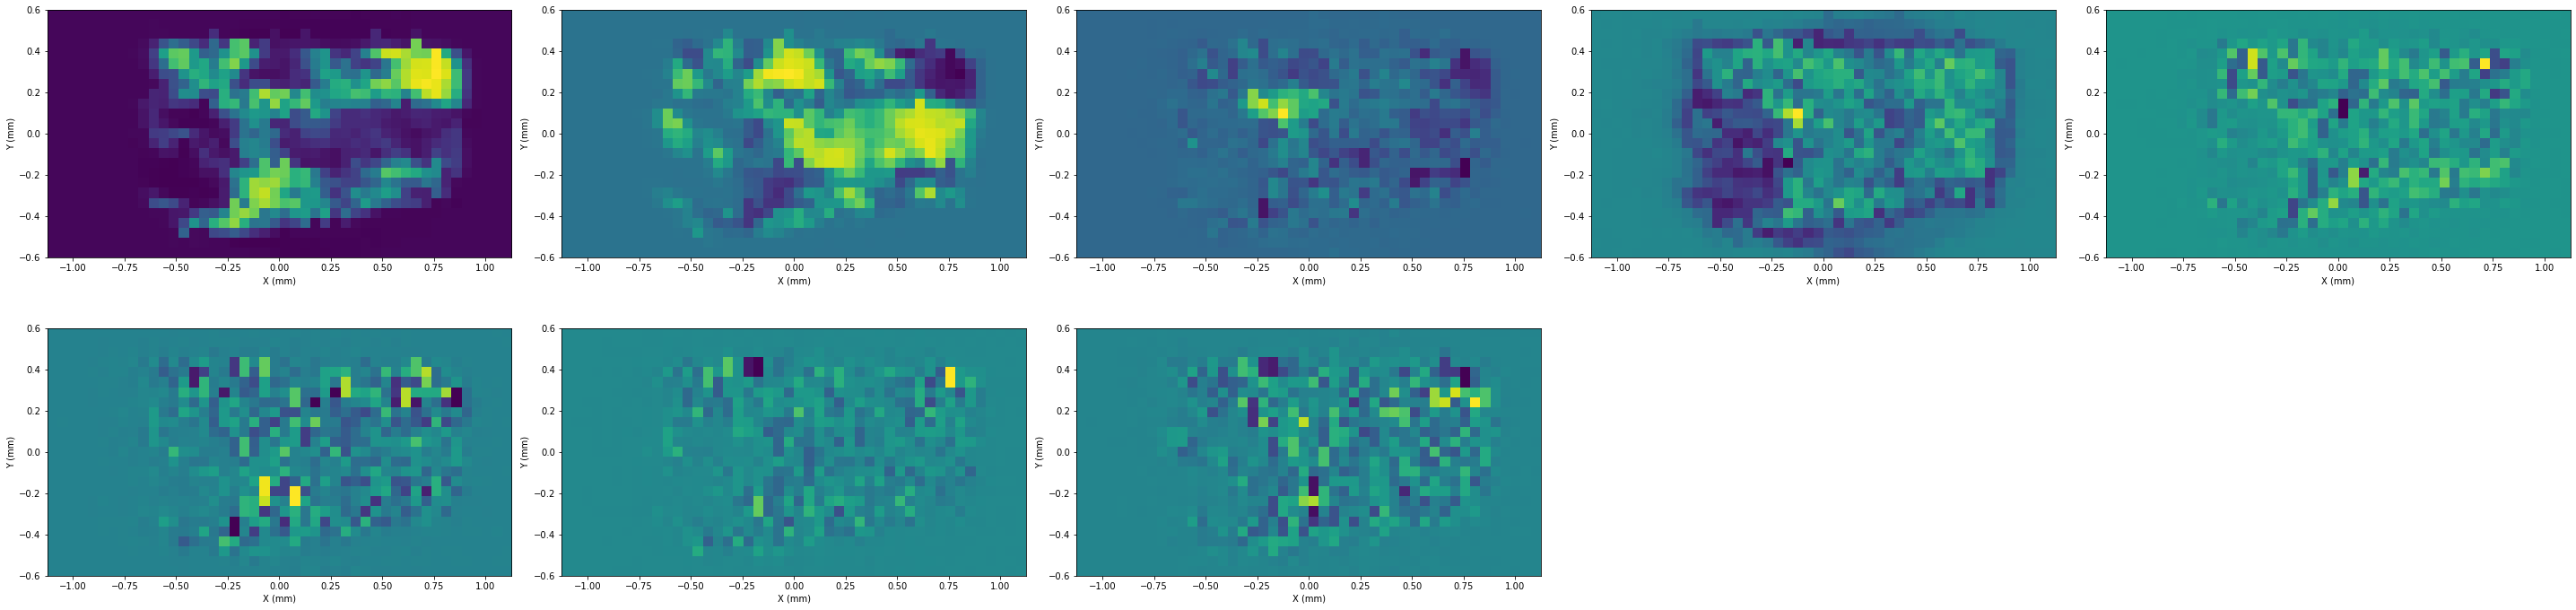

Elapsed Time:  0.7788605690002441


In [11]:
t1 = time.time()

fig = plt.figure(figsize=(8*n_col, 5*n_row))
for i in range(n_comp):
    curax = fig.add_subplot(n_row, n_col, i+1, xlabel='X (mm)', ylabel='Y (mm)')
    curim = np.reshape(components[:, i], (xn, yn))
    curax.imshow(curim.T, extent = [-xw/2, xw/2, -yw/2, yw/2], origin='lower')
fig.tight_layout()
plt.show()

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

# (3-1-viii) Output

- Save Directory

In [12]:
# default is to create "out" folder in the current directory, if not exist
import os
savedir = './out/'
if os.path.isdir(savedir) == False:
    os.mkdir(savedir)

- CR & CCR

In [13]:
np.savetxt(savedir+'pca_npc'+str(n_comp)+'_cr.txt', cr, delimiter='\r\n')
np.savetxt(savedir+'pca_npc'+str(n_comp)+'_xcr.txt', xcr, delimiter='\r\n')
np.savetxt(savedir+'pca_npc'+str(n_comp)+'_ccr.txt', ccr, delimiter='\r\n')
np.savetxt(savedir+'pca_npc'+str(n_comp)+'_xccr.txt', xccr, delimiter='\r\n')

- Principal components after dimensional reduction

In [14]:
for i in range(n_comp):
    curwv = H[:, i]
    np.savetxt(savedir+'pca_npc'+str(n_comp)+'_pc'+str(i+1)+'.txt', curwv, delimiter='\r\n')
    np.savetxt(savedir+'pca_npc'+str(n_comp)+'_xpc'+str(i+1)+'.txt', slice_axis, delimiter='\r\n')

- Score Plot

In [15]:
np.savetxt(savedir+'pca_npc'+str(n_comp)+'_score_plot_pc'+str(tarPC1+1)+'.txt', compwv1, delimiter='\r\n')
np.savetxt(savedir+'pca_npc'+str(n_comp)+'_score_plot_pc'+str(tarPC2+1)+'.txt', compwv2, delimiter='\r\n')

- Spatial distribution of principal components

In [16]:
for i in range(n_comp):
    curim = np.reshape(components[:, i], (xn, yn))
    np.savetxt(savedir+'pca_npc'+str(n_comp)+'_spmap_pc'+str(i+1)+'.txt', curim, delimiter='\t')